In [1]:
%%capture
%pip install -U 'rockfish[labs]' -f 'https://docs142.rockfish.ai/packages/index.html'

In [2]:
import pandas as pd
import random

import rockfish as rf
import rockfish.labs

In [3]:
def generate_data(num_rows, rng):
    numerical_1 = [rng.uniform(1, 100) for _ in range(num_rows)]
    numerical_2 = [rng.random() * 10 for _ in range(num_rows)]
    categorical_1 = rng.choices(["A", "B", "C"], weights=[1, 1, 2], k=num_rows)
    categorical_2 = rng.choices(["X", "Y", "Z"], weights=[1, 2, 3], k=num_rows)

    data = {
        "numerical_1": numerical_1,
        "numerical_2": numerical_2,
        "categorical_1": categorical_1,
        "categorical_2": categorical_2,
    }
    return pd.DataFrame(data)

rng = random.Random(42)
data = rf.Dataset.from_pandas("sample1", generate_data(100, rng))
syn = rf.Dataset.from_pandas("sample2", generate_data(100, rng))

### 1. Bar charts for categorical field

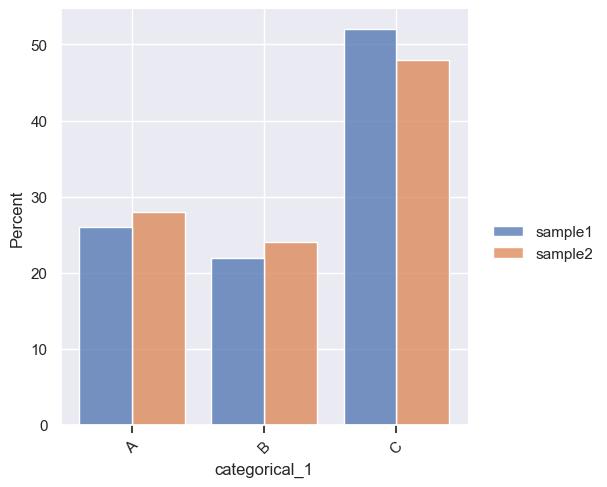

In [4]:
display_order = ["A", "B", "C"]
d1_discrete_agg = rf.metrics.count_all(data, "categorical_1", nlargest = 10)
d2_discrete_agg = rf.metrics.count_all(syn, "categorical_1", nlargest = 10)

rf.labs.vis.plot_bar(
    [d1_discrete_agg, d2_discrete_agg], "categorical_1", "categorical_1_count", order= display_order
)

### 2. Histpgram plot for the numerical field

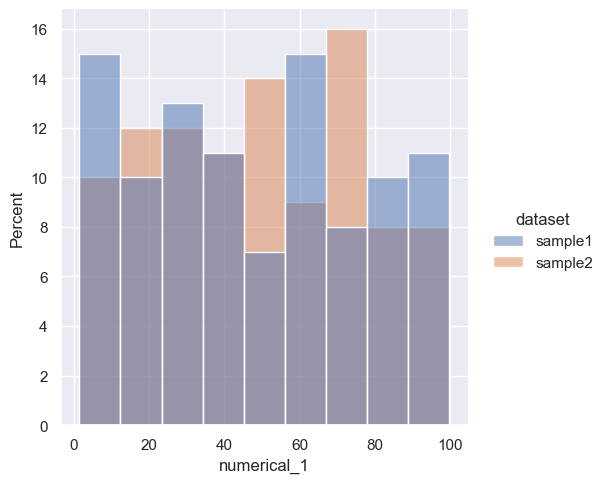

In [5]:
rf.labs.vis.plot_hist([data, syn], "numerical_1")

### 3. Probablity density function for numerical fields

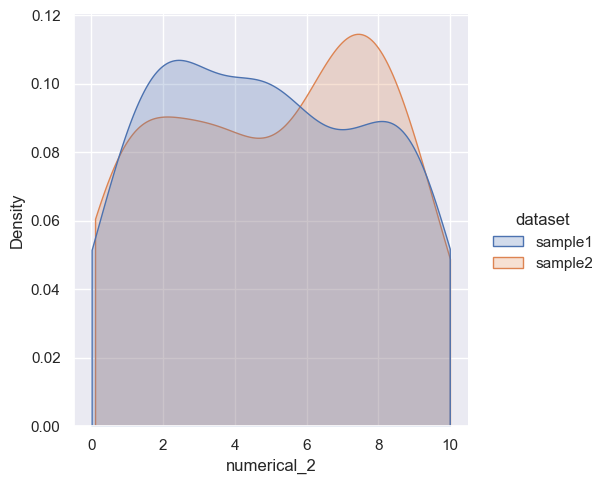

In [6]:
rf.labs.vis.plot_kde([data, syn], "numerical_2")

### 4. Scatter plot for two numerical fields

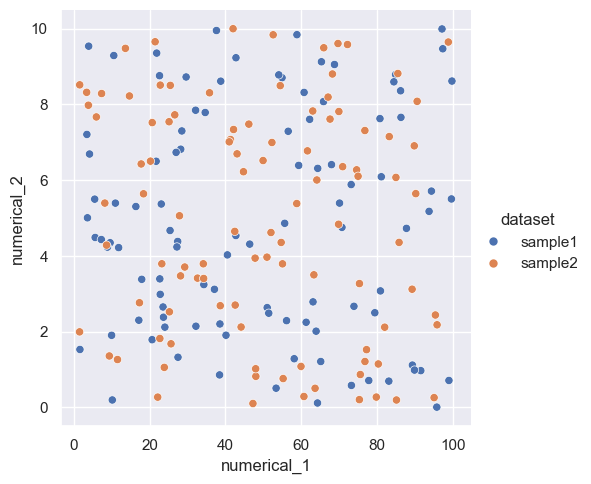

In [7]:
rf.labs.vis.plot_scatter([data, syn], "numerical_1", "numerical_2")

### 5. Scatter plot showing pearson correlation

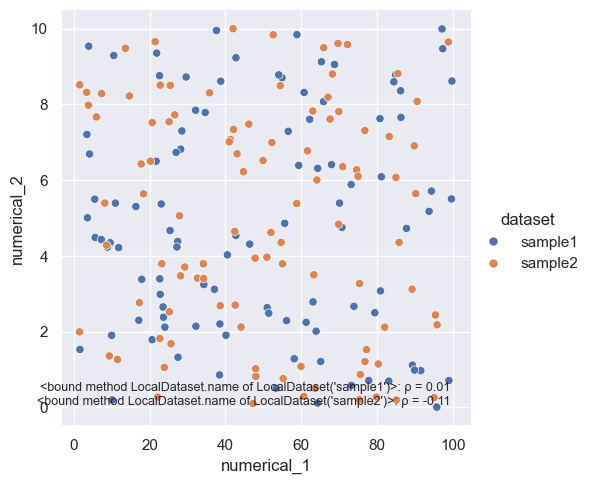

In [8]:
rf.labs.vis.plot_correlation([data, syn], "numerical_1", "numerical_2")

### 6. Heatmap of Pearson Correlation between multiple numerical fields

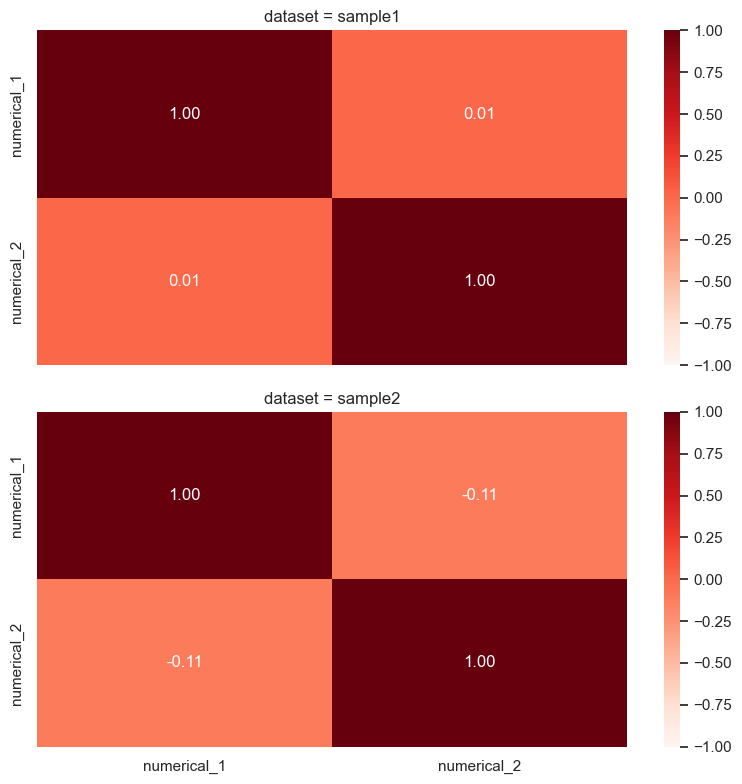

In [9]:
rf.labs.vis.plot_correlation_heatmap(
    datasets=[data, syn],
    fields=["numerical_1", "numerical_2"],
    annot=True,  # show values on the heapmap
    fmt=".2f",  # rounding values to 2 decimal places
)

### 7. Heatmap of Association between multiple categorical fields

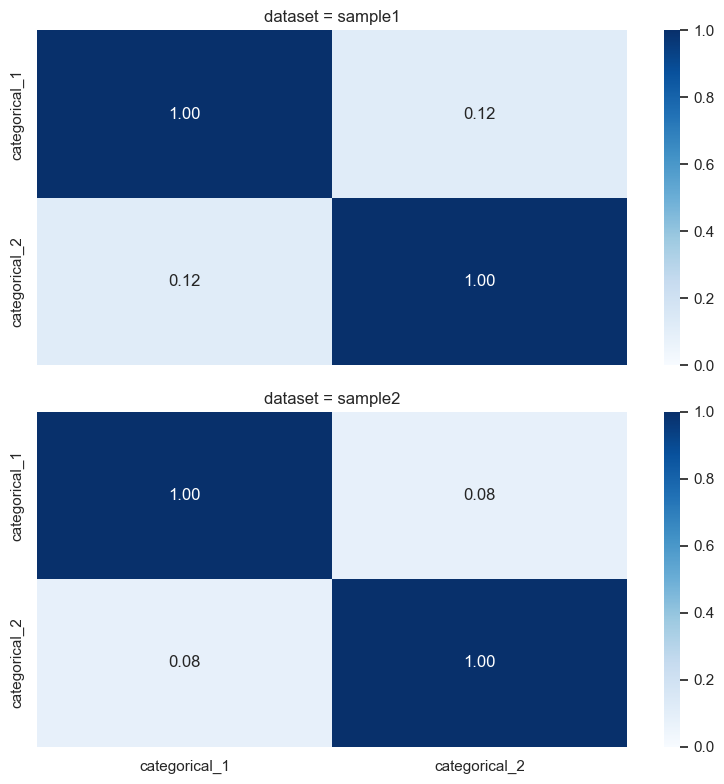

In [10]:
rf.labs.vis.plot_association_heatmap(
    datasets=[data, syn],
    fields=["categorical_1", "categorical_2"],
    annot=True,  # show values on the heapmap
    fmt=".2f",  # rounding values to 2 decimal places
)